## 다음 실시간 주요 뉴스 크롤링
----

### 1. 뉴스 페이지 정보 탐색

----
#### 1) requests로 데이터 접근하기

In [2]:
import time

from selenium import webdriver
import requests
from bs4 import BeautifulSoup

url = "https://news.daum.net/"
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, "html.parser")
item_issues = soup.find_all("div", attrs={"class":"item_issue"})

In [3]:
print(len(item_issues))

20


In [4]:
url = "https://news.daum.net/"
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, "html.parser")
item_issues = soup.find_all("div", attrs={"class":"item_issue"})
for item_issue in item_issues:
    url = item_issue.find("a", attrs={"class":"link_txt"})['href']
    print(url)

https://v.daum.net/v/20240612040846007
https://v.daum.net/v/20240612050118308
https://v.daum.net/v/20240612063603651
https://v.daum.net/v/20240612063710669
https://v.daum.net/v/20240612062908525
https://v.daum.net/v/20240612062655498
https://v.daum.net/v/20240612060259219
https://v.daum.net/v/20240612061614415
https://v.daum.net/v/20240612060333238
https://v.daum.net/v/20240612060122143
https://v.daum.net/v/20240612060104112
https://v.daum.net/v/20240612053124695
https://v.daum.net/v/20240612060116138
https://v.daum.net/v/20240612033110939
https://v.daum.net/v/20240612055701947
https://v.daum.net/v/20240612061323365
https://v.daum.net/v/20240612061945445
https://v.daum.net/v/20240612060008977
https://v.daum.net/v/20240612045445165
https://v.daum.net/v/20240612061514399


In [12]:
url = "https://news.daum.net/"
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, "html.parser")
item_issues = soup.find_all("div", attrs={"class":"item_issue"})

row_list = []
for item_issue in item_issues:
    url = item_issue.find("a", attrs={"class":"link_txt"})['href']
    title = item_issue.find("a", attrs={"class":"link_txt"}).text
    title = title.strip()
    category = item_issue.find("span", attrs={"class":"txt_category"}).text
    row = {'title': title, 'category': category, 'url': url}
    row_list.append(row)

In [13]:
import pandas as pd

df = pd.DataFrame(row_list)
df.head()

,title,category,url
0,“우리 팬을 무시해?” 中관중 야유에…‘손가락 도발’로 되갚아 준 손흥민,사회,https://v.daum.net/v/20240612065003852
1,"""트럼프 유죄평결 끌어낸 검사들, 내달 12일 美의회 출석""",국제,https://v.daum.net/v/20240612064548798
2,[상법개정 해법]①삼성 기소에서 제기된 '이사의 충실의무' 논쟁,경제,https://v.daum.net/v/20240612060235212
3,"[STOCK] '100억 횡령' 우리금융, 기관 돈 뺀다… 시총 순위 40위 '뚝'",경제,https://v.daum.net/v/20240612040846007
4,"[헬스S] ""문 제대로 안 잠갔나"" 걱정 반복된다면…",경제,https://v.daum.net/v/20240612050118308


----
#### 2) 본문 데이터 가져오기
- 어뷰징으로 분류될 수 있기 때문에 느려도 driver 사용

In [15]:
url = "https://news.daum.net/"
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, "html.parser")
item_issues = soup.find_all("div", attrs={"class":"item_issue"})

driver = webdriver.Chrome()
row_list = []
for item_issue in item_issues:
    # 어뷰징 분류 방지를 위한 sleep
    time.sleep(2)
    
    # 메인페이지 정보
    url = item_issue.find("a", attrs={"class":"link_txt"})['href']
    title = item_issue.find("a", attrs={"class":"link_txt"}).text
    title = title.strip()
    category = item_issue.find("span", attrs={"class":"txt_category"}).text
    
    # 세부페이지 정보
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    article = soup.find("div", attrs={"class":"article_view"})
    article = article.text.strip()
    
    row = {'title': title, 'category': category, 'url': url, 'article': article}
    row_list.append(row)
    
driver.quit()

In [ ]:
df = pd.DataFrame(row_list)
df.head()

### 2. 뉴스 데이터 분석

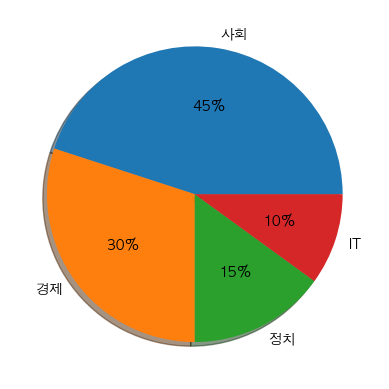

In [33]:
import matplotlib.pyplot as plt

labels = df['category'].value_counts().index.tolist()
fracs1 = df['category'].value_counts().values.tolist()

plt.rc('font', family='AppleGothic')  # 맥OS를 사용하고 있을 때
# plt.rc('font', family='MalgunGothic')  # 윈도우를 사용하고 있을 떄
plt.pie(fracs1, labels=labels, autopct='%.0f%%', shadow=True)
plt.show()

In [34]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

In [35]:
# 정제 함수 적용
df['article'] = df['article'].apply(lambda x: text_cleaning(x))

In [36]:
# 말뭉치 생성
article_corpus = "".join(df['article'].tolist())
print(article_corpus)

사토 요이치 틱톡 아태 운영 제너럴매니저가 이노베이트 코리아 에서 신인류 숏폼크리에이터    를 주제로 강연하고 있다 대전임세준 기자           평범한 한국 고등학생이 올린 영상이 글로벌 트렌드를 만들었습니다사토 요이치 틱톡 아태 운영 제너럴매니저가 일 대전  류근철 스포츠 콤플렉스에서 헤럴드미디어그룹 주최로 열린 이노베이트 코리아 에서 신인류 숏폼크리에이터    를 주제로 한 강연에서 이같이 말했다지난해 월 전세계를 강타한 슬릭백 챌린지를 두고 한 이야기다 틱톡에서 대구전자공고 학년 이효철 학생의 슬릭백 춤은 누적 조회수 억여 회를 달성한 바 있다이에 대해 사토 제너럴매니저는 틱톡에서는 팔로워가 많지 않아도 전세계적으로 터지는 콘텐츠가 탄생할 수 있다며 처음으로 올리는 콘텐츠가 조회수 만 회 이상 히트를 친 경우도 많다고 설명했다이처럼 초보 숏폼 크리에이터들도 대박을 칠 수 있는 원천은 서로를 놀이 상대이자 친구로 여기는 크리에이터 커뮤니티에 있다는 게 사토 제너럴매니저의 분석이다구체적인 크리에이터 커뮤니티의 특징으로 하나의 글로벌 커뮤니티 서브컬처 트렌드 파급력 등 가지를 꼽았다 틱톡에서 국경 없이 활동하는 약 억 명의 숏폼 크리에이터들이 서로의 콘텐츠를 차 차 콘텐츠로 재생산하는 과정에서 파급력이 큰 문화적 트렌드가 나타난다는 설명이다사토 제너럴 매니저는 틱톡은 이용자가 실제로 본 콘텐츠 반응에 기반하기 때문에 크리에이터들이 팔로워 수를 올리기 위한 경쟁을 할 필요가 없다며 오히려 협업을 원하는 문화가 있다고 덧붙였다숏폼 크리에이터는 신인류로 불릴 만큼 존재감을 키워가면서 이들이 일으키는 경제적 효과도 무시할 수 없는 규모가 됐다 글로벌 투자은행 골드만삭스는 전세계에서 숏폼 크리에이터 산업이 지난해 조원에서 년 약 조원까지 성장할 것으로 전망했다숏폼 크리에이터들 사이에서 최근 눈에 띄는 흐름은 바로 콘텐츠의 글로벌화다 미국에서 벌어진 냉동 김밥 품절 사태의 시작점에도 한 재미교포 틱톡 크리에이터가 있었기 때문이다 단순히 김밥을 먹는 영상이 만회 넘

In [37]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(article_corpus)
count = Counter(nouns)

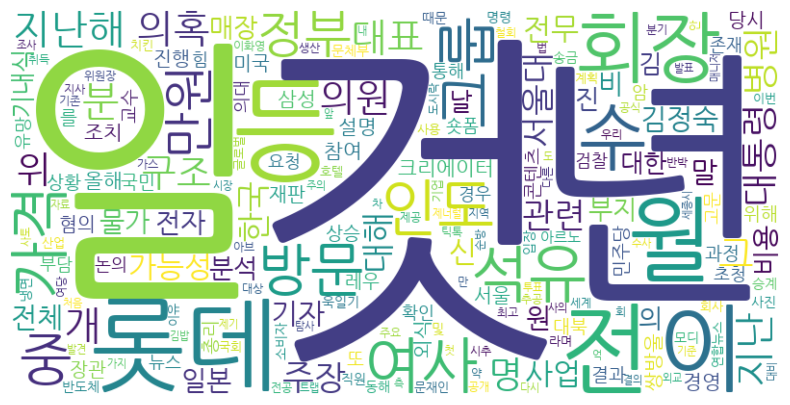

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Path to a Korean font
font_path = './etc/NanumGothic.ttf'  # Update this to the correct path of your Korean font file

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path
).generate_from_frequencies(count)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()